In [1]:
import json
from matplotlib.font_manager import json_dump
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
from datetime import datetime
import time
import seaborn as sns
import matplotlib.pylab as plt

sf_data = []
vicon_data = []
dataset_name = "moving_vertical_strip_3"
threshold_sf_up = 1662115152.8
threshold_sf_down = 1662115256
threshold_vc_up = 1662115153.7486753
threshold_vc_down = 1662115255.375461

for line in open("../Dataset_sensor_floor/sensorfloor_measurement/02092022/sensor_floor_data_02092022_" + dataset_name + ".txt", "r"):
    sf_data.append(json.loads(line))

df_sf = pd.DataFrame(sf_data)
df_sf

,timestamp,strip_id,node_id,data,column_num
0,1.662115e+09,10,12,"[{'a': [0.05810546875, 0.187255859375, 0.97802...",10
1,1.662115e+09,3,9,"[{'a': [0.033935546875, 0.138916015625, 1.0322...",3
2,1.662115e+09,5,1,"[{'a': [0.037353515625, 0.16015625, 1.00561523...",5
3,1.662115e+09,23,14,"[{'a': [0.0498046875, 0.12451171875, 1.0566406...",23
4,1.662115e+09,8,8,"[{'a': [0.0419921875, 0.0888671875, 1.00732421...",8
...,...,...,...,...,...
1855,1.662115e+09,18,2,"[{'a': [0.04443359375, 0.130126953125, 1.04565...",18
1856,1.662115e+09,19,9,"[{'a': [0.06494140625, 0.090087890625, 1.03540...",19
1857,1.662115e+09,21,2,"[{'a': [0.046142578125, 0.161865234375, 1.0166...",21
1858,1.662115e+09,6,4,"[{'a': [0.033203125, 0.22119140625, 0.99707031...",6


In [2]:
# #THRESHOLD TIMESTAMP
#------ Dataset 0308
# #Dataset Moving Around: 1659534341.1144
# #Dataset Moving Edge: vc: 1659531074.02 ; sf: .13
# #Dataset Moving Diag 5-11 to 21-3: vc: 1659531363.02 ; sf: .04
# #Dataset Moving Diag 21-10 to 5-3: vc: 1659531522.23 ; sf: .27
# #Dataset Moving Hor 4-4 to 21-4: vc: < 1659531672.99 ; sf: 73.00 & > 1659531693.17
# #Dataset Moving Diag 21-6 to 4-6 to 21-9: vc: 1659531860.05 ; sf: .14
# #Dataset Moving Ver 7-9 to 7-3 to 9-3 to 9-9: vc: 1659532333.10 ; sf: .13
# #Dataset Moving Ver 10-9 to 10-3 to 13-3 to 13-9: vc: < 1659532488.180 ; sf: 88.210 & > 1659532529.20
# #Dataset Moving Ver 14-9 to 14-3 to 16-3 to 17-9: vc: 1659532729.310 ; sf: .30
# #Dataset Moving Ver 17-9 to 17-3 to 20-3 to 20-9: vc: 1659532980.68 ; sf: .67
# #Dataset Moving Ver 18-9 to 18-3 to 15-3 to 15-9: vc: 1659533165.63 ; sf: .62
# #Dataset Moving Ver 14-9 to 14-3 to 12-3 to 12-9: vc: 1659533346.87 ; sf: .91
# #Dataset Moving Ver 11-9 to 11-3 to 8-3 to 8-9: vc: < 1659533564.6 ; sf: .62 & > 1659533598.97
# #Dataset Moving Ver 7-9 to 6-3 to 4-3 to 4-9: vc: 1659533710.19 ; sf: .23

#------ Dataset 1708
# #Dataset Moving Around 4: vc: 1660728941.93 ; sf: 1660728942.00

**Build the dataframe of sensor floors**

In [3]:
#Merge multiple sensor floor datasets.txt
"""
Horizontal 1: moving_horizontal_node_9, moving_horizontal_node_7
Horizontal 2: moving_horizontal_node_6, moving_horizontal_node_4
Diagonal 1: moving_diagonal_3-3_21-9, moving_diagonal_21-9_3-3
Diagonal 2: moving_diagonal_14-9_21-3, moving_diagonal_21-3_3-9
Diagonal 3: moving_diagonal_3-9_15-3, moving_diagonal_15-9_3-3, moving_diagonal_4-3_10-9
Diagonal 4: moving_diagonal_7-9_3-6, moving_diagonal_13-5_16-9, moving_diagonal_18-8_16-3
Vertical 1: moving_vertical_strip_21, moving_vertical_strip_20, moving_vertical_strip_19, moving_vertical_strip_18
Vertical 2: moving_vertical_strip_17, moving_vertical_strip_16, moving_vertical_strip_15, moving_vertical_strip_14
Vertical 3: moving_vertical_strip_13, moving_vertical_strip_12, moving_vertical_strip_11, moving_vertical_strip_10
Vertical 4: moving_vertical_strip_4, moving_vertical_strip_3
"""

'\nHorizontal 1: moving_horizontal_node_9, moving_horizontal_node_7\nHorizontal 2: moving_horizontal_node_6, moving_horizontal_node_4\nDiagonal 1: moving_diagonal_3-3_21-9, moving_diagonal_21-9_3-3\nDiagonal 2: moving_diagonal_14-9_21-3, moving_diagonal_21-3_3-9\nDiagonal 3: moving_diagonal_3-9_15-3, moving_diagonal_15-9_3-3, moving_diagonal_4-3_10-9\nDiagonal 4: moving_diagonal_7-9_3-6, moving_diagonal_13-5_16-9, moving_diagonal_18-8_16-3\nVertical 1: moving_vertical_strip_21, moving_vertical_strip_20, moving_vertical_strip_19, moving_vertical_strip_18\nVertical 2: moving_vertical_strip_17, moving_vertical_strip_16, moving_vertical_strip_15, moving_vertical_strip_14\nVertical 3: moving_vertical_strip_13, moving_vertical_strip_12, moving_vertical_strip_11, moving_vertical_strip_10\nVertical 4: moving_vertical_strip_4, moving_vertical_strip_3\n'

In [4]:
# #1st option
# df_sf_buf = df_sf.copy()
# df_sf_buf = df_sf_buf.reindex(df_sf_buf.columns.tolist() + ['rssi','mx','my','mz'], axis=1) 

# for index, row in df_sf_buf.T.items():
#     rssi = []
#     magneto = []
#     for i in range(len(df_sf_buf['data'][index])):
#         #print((test_df['data'][index][i]['r']))
#         rssi.append(df_sf_buf['data'][index][i]['r'])
#         magneto.append(df_sf_buf['data'][index][i]['m'])
    
#     rssi_avg = np.round(np.mean(rssi, axis=0),2)
#     magneto_avg = np.round(np.mean(magneto, axis=0),2)
#     df_sf_buf.loc[index,'rssi'] = rssi_avg[0]
#     df_sf_buf.loc[index,'mx']  = magneto_avg[0]
#     df_sf_buf.loc[index,'my']  = magneto_avg[1]
#     df_sf_buf.loc[index,'mz']  = magneto_avg[2]
#     rssi.clear()
#     magneto.clear()

# df_sf_final = df_sf_buf.drop(columns=['data'])
# #df_sf_final['timestamp'] = df_sf_final['timestamp'].multiply(1000) #in ms
# df_sf_final

In [5]:
#test timestamp interpolation
#t_batch_i_now = np.zeros((23,15))
t_batch_i_old = np.zeros((23,15))
df_sf_buf = df_sf.copy()


#df_sf_buf = df_sf_buf.reindex(df_sf_buf.columns.tolist() + ['ax','ay','az','gx','gy','gz','mx','my','mz','rssi'], axis=1) 
out = []
for index, row in df_sf_buf.T.items():
    index_strip_id = int(df_sf_buf['strip_id'][index])
    index_node_id = int(df_sf_buf['node_id'][index])
    #t_batch_i_now[index_strip_id][index_node_id] = df_sf_buf['timestamp'][index]
    #print(t_batch_i_old[index_strip_id-1][index_node_id-1])
    delta_t = 0
    timestamp_i = 0

    #check timestamp
    if t_batch_i_old[index_strip_id-1][index_node_id-1] < df_sf_buf['timestamp'][index] and t_batch_i_old[index_strip_id-1][index_node_id-1] > 0:
        delta_t = (df_sf_buf['timestamp'][index] - t_batch_i_old[index_strip_id-1][index_node_id-1])/len(df_sf_buf['data'][index])
        
        for i in range(len(df_sf_buf['data'][index])):
            t_i = t_batch_i_old[index_strip_id-1][index_node_id-1] + ((1+i)*delta_t)
            #if df_sf_buf['data'][index][i]['r'][0] < 0:
                #print('iter > 0: ', delta_t)
            out.append({'timestamp':t_i,'strip_id':df_sf_buf['strip_id'][index],'node_id':df_sf_buf['node_id'][index],
                'ax':df_sf_buf['data'][index][i]['a'][0],'ay':df_sf_buf['data'][index][i]['a'][1],'az':df_sf_buf['data'][index][i]['a'][2],
                'gx':df_sf_buf['data'][index][i]['g'][0],'gy':df_sf_buf['data'][index][i]['g'][1],'gz':df_sf_buf['data'][index][i]['g'][2],
                'mx':df_sf_buf['data'][index][i]['m'][0],'my':df_sf_buf['data'][index][i]['m'][1],'mz':df_sf_buf['data'][index][i]['m'][2],
                'r':df_sf_buf['data'][index][i]['r'][0]})
        t_batch_i_old[index_strip_id-1][index_node_id-1] = df_sf_buf['timestamp'][index]
    elif t_batch_i_old[index_strip_id-1][index_node_id-1] == 0:
        delta_t = 4/19
        #print('iter 0: ', delta_t)
        for i in range(len(df_sf_buf['data'][index])):
            t_i = (df_sf_buf['timestamp'][index]-4) + ((1+i)*delta_t)
            
            #if df_sf_buf['data'][index][i]['r'][0] < 0:
                #print(t_i)
            out.append({'timestamp':t_i,'strip_id':df_sf_buf['strip_id'][index],'node_id':df_sf_buf['node_id'][index],
                'ax':df_sf_buf['data'][index][i]['a'][0],'ay':df_sf_buf['data'][index][i]['a'][1],'az':df_sf_buf['data'][index][i]['a'][2],
                'gx':df_sf_buf['data'][index][i]['g'][0],'gy':df_sf_buf['data'][index][i]['g'][1],'gz':df_sf_buf['data'][index][i]['g'][2],
                'mx':df_sf_buf['data'][index][i]['m'][0],'my':df_sf_buf['data'][index][i]['m'][1],'mz':df_sf_buf['data'][index][i]['m'][2],
                'r':df_sf_buf['data'][index][i]['r'][0]})
            t_batch_i_old[index_strip_id-1][index_node_id-1] = df_sf_buf['timestamp'][index]


    # for i in range(len(df_sf_buf['data'][index])):
    #     t_i = 
    #     out.append({'timestamp':df_sf_buf['timestamp'][index],'strip_id':df_sf_buf['strip_id'][index],'node_id':df_sf_buf['node_id'][index],
    #         'ax':df_sf_buf['data'][index][i]['a'][0],'ay':df_sf_buf['data'][index][i]['a'][0],'az':df_sf_buf['data'][index][i]['a'][0],
    #         'gx':df_sf_buf['data'][index][i]['g'][0],'gy':df_sf_buf['data'][index][i]['g'][0],'gz':df_sf_buf['data'][index][i]['g'][0],
    #         'mx':df_sf_buf['data'][index][i]['m'][0],'my':df_sf_buf['data'][index][i]['m'][0],'mz':df_sf_buf['data'][index][i]['m'][0],
    #         'rssi':df_sf_buf['data'][index][i]['r'][0]})

df_sf_final = pd.DataFrame(out)

#df_sf_final['timestamp'] = df_sf_final['timestamp'].multiply(1000) #in ms
df_sf_final

,timestamp,strip_id,node_id,ax,ay,az,gx,gy,gz,mx,my,mz,rssi
0,1.662115e+09,10,12,0.058105,0.187256,0.978027,-0.946565,1.427481,0.854962,40.05,260.25,41.25,-73
1,1.662115e+09,10,12,0.057617,0.181152,0.981689,-1.229008,1.389313,0.694656,39.90,261.45,40.35,-72
2,1.662115e+09,10,12,0.060303,0.182617,0.976074,-0.946565,1.297710,0.717557,40.50,258.15,40.50,-72
3,1.662115e+09,10,12,0.057129,0.180420,0.977783,-0.862595,1.290076,0.916031,39.00,260.25,41.55,-73
4,1.662115e+09,10,12,0.060059,0.182129,0.981445,-1.007634,1.259542,0.809160,39.60,259.80,42.75,-72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35013,1.662115e+09,13,8,0.009277,0.160156,1.078125,1.282443,2.885496,1.641221,132.90,2.40,40.50,-85
35014,1.662115e+09,13,8,0.008545,0.159180,1.067627,1.862595,3.145038,1.610687,131.70,2.55,41.70,-85
35015,1.662115e+09,13,8,0.010254,0.154785,1.071289,1.801527,2.862595,1.748092,133.20,1.05,42.60,-85
35016,1.662115e+09,13,8,0.012451,0.156738,1.068115,1.961832,3.076336,1.496183,133.50,1.80,40.65,0


In [6]:
#df_sf_filter = df_sf_final[(df_sf_final['timestamp'] < threshold_sf_down) & (df_sf_final['timestamp'] > threshold_sf_up) ]
df_sf_filter = df_sf_final[(df_sf_final['timestamp'] < threshold_sf_down)]
df_sf_filter

,timestamp,strip_id,node_id,ax,ay,az,gx,gy,gz,mx,my,mz,rssi
0,1.662115e+09,10,12,0.058105,0.187256,0.978027,-0.946565,1.427481,0.854962,40.05,260.25,41.25,-73
1,1.662115e+09,10,12,0.057617,0.181152,0.981689,-1.229008,1.389313,0.694656,39.90,261.45,40.35,-72
2,1.662115e+09,10,12,0.060303,0.182617,0.976074,-0.946565,1.297710,0.717557,40.50,258.15,40.50,-72
3,1.662115e+09,10,12,0.057129,0.180420,0.977783,-0.862595,1.290076,0.916031,39.00,260.25,41.55,-73
4,1.662115e+09,10,12,0.060059,0.182129,0.981445,-1.007634,1.259542,0.809160,39.60,259.80,42.75,-72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28052,1.662115e+09,13,11,0.015869,0.081543,0.996582,0.709924,0.725191,-0.030534,12.60,-48.45,193.95,-85
28071,1.662115e+09,9,5,0.076416,0.119629,0.994873,-0.419847,1.167939,1.564885,-7.05,28.20,-103.20,-73
28109,1.662115e+09,14,12,0.042725,0.164551,1.022217,-1.206107,1.343511,3.000000,48.45,11.40,-78.75,-94
28146,1.662115e+09,2,6,0.024414,0.134766,0.997559,-0.557252,0.763359,0.381679,60.75,52.50,164.55,-80


In [7]:
#df_sf_final.to_csv('02092022_Moving_edge_test_t.csv')

In [ ]:
"""Example Resample Sensor Floor Data"""
# #df_strip_node_id = pd.DataFrame(columns=['strip_id','node_id','timestamp'])
# df_strip_node_id = df_sf_final[['strip_id','node_id','timestamp']].copy()
# df_strip_node_id['strip_id'] = pd.to_numeric(df_strip_node_id['strip_id'])
# df_strip_node_id['node_id'] = pd.to_numeric(df_strip_node_id['node_id'])
# df_strip_node_id['time'] = pd.to_datetime(df_strip_node_id['timestamp'],unit='s')
# df_strip_node_id = df_strip_node_id.set_index('time')
# # #df_sf_resample
# df_strip_node_id = df_strip_node_id.resample('40ms').mean().ffill()
# df_strip_node_id

#----------------------------------------------------------------------------------#
# df_sf_resample = df_sf_final.copy()
# df_sf_resample['strip_id'] = pd.to_numeric(df_sf_resample['strip_id'])
# df_sf_resample['node_id'] = pd.to_numeric(df_sf_resample['node_id'])
# df_sf_resample['time'] = pd.to_datetime(df_sf_resample['timestamp'],unit='s')
# df_sf_resample = pd.melt(df_sf_resample, id_vars=['strip_id','node_id','ax','ay','az','gx','gy','gz','mx','my','mz','r','timestamp'], value_name='time').drop('variable', axis=1)
# df_sf_resample = df_sf_resample.set_index('time')
# # #df_sf_resample
# df_sf_final = df_sf_resample.resample('25ms').mean()
# # df_sf_final = df_sf_final.dropna()
# # # df_sf_final['timestamp'] = df_sf_final.index.astype(np.int64) / int(1e9)
# df_sf_final

# df_sf_final.to_csv('sf_data_run1_diagonal_resample.csv',index=False)

#------------------------------------------------------------------------------#
# df_sf_resample = df_sf_final.copy()
# df_sf_resample['time'] = pd.to_datetime(df_sf_resample['timestamp'],unit='s')
# df_sf_final = pd.melt(df_sf_resample, id_vars=['strip_id','node_id','ax','ay','az','gx','gy','gz','mx','my','mz','r','timestamp'], value_name='time').drop('variable', axis=1)
# df_sf_final = df_sf_final.groupby(['strip_id','node_id']).apply(lambda x : x.drop_duplicates(['strip_id','node_id','ax','ay','az','gx','gy','gz','mx','my','mz','r','timestamp'])
#                                           .set_index('time')
#                                           .resample('50ms')
#                                           .mean())
# df_sf_final


#----------------------------------------------------------------------#
# # the inverse of groupby, reset_index
# df_sf_clean = df_sf_final.reset_index()

# # set again the timestamp as index
# df_sf_clean = df_sf_clean.set_index('time')

# df_sf_clean = df_sf_clean.sort_values('timestamp')
# df_sf_clean = df_sf_clean.dropna()
# df_sf_clean

# df_sf_clean.to_csv('sf_data_run1_diagonal_resample.csv',index=False)

# #df_sf_resample = df_sf_resample.set_index('timestamp')
# df_sf_final = df_sf_resample.resample('45ms').mean()
# #df_sf_final = df_sf_final.dropna()
# #df_sf_final['timestamp'] = df_sf_final.index.astype(np.int64) / int(1e9)
# df_sf_final

**Build Dataset of VICON Coordinates**

In [8]:
#DATASET OF VICON COORDINATES
for line in open("../Dataset_sensor_floor/vicon_measurement/02092022/vicon_data_02092022_" + dataset_name + ".txt", "r"):
    vicon_data.append(json.loads(line))

df_vicon = pd.DataFrame(vicon_data)
#df_vicon['time'] = pd.to_datetime(df_vicon['time'],unit='s')
#df_vicon['time'] = df_vicon['time'].multiply(1000)
df_vicon

,object,translation,rotation,time
0,/vicon/rb1_base_c/rb1_base_c,"[-9.022744090082867, 4.701307499492385, 0.1147...","[-0.012683980587251554, 0.009186435970248333, ...",1.662115e+09
1,/vicon/rb1_base_c/rb1_base_c,"[-9.022839952091998, 4.701246605047967, 0.1144...","[-0.013034410010812555, 0.009181459500601582, ...",1.662115e+09
2,/vicon/rb1_base_c/rb1_base_c,"[-9.022512923383694, 4.700967269574652, 0.1157...","[-0.013217092257534547, 0.00848438154016244, -...",1.662115e+09
3,/vicon/rb1_base_c/rb1_base_c,"[-9.0225111524452, 4.700930763857925, 0.115466...","[-0.013180661537104028, 0.008119103028465025, ...",1.662115e+09
4,/vicon/rb1_base_c/rb1_base_c,"[-9.02284505583694, 4.701227852409661, 0.11456...","[-0.013033934049455388, 0.009072517399761428, ...",1.662115e+09
...,...,...,...,...
2667,/vicon/rb1_base_c/rb1_base_c,"[-8.414885892385431, -3.539362232081012, 0.147...","[0.002710884016416917, -0.0019618375603855562,...",1.662115e+09
2668,/vicon/rb1_base_c/rb1_base_c,"[-8.414897627173398, -3.5395639456938817, 0.14...","[0.001995617466608307, -0.0021811563474707827,...",1.662115e+09
2669,/vicon/rb1_base_c/rb1_base_c,"[-8.414721939457657, -3.5392183132559896, 0.14...","[0.003534921554592278, -0.001874759587208034, ...",1.662115e+09
2670,/vicon/rb1_base_c/rb1_base_c,"[-8.414929201739898, -3.539357260847263, 0.147...","[0.0026517336255143286, -0.0017249634387252629...",1.662115e+09


In [9]:
df_vicon_buf = df_vicon.copy()
df_vicon_buf = df_vicon_buf.reindex(df_vicon_buf.columns.tolist() + ['X','Y'], axis=1) 

for index, row in df_vicon_buf.T.items():
    for i in range(len(df_vicon_buf['translation'][index])):
        #print((test_df['data'][index][i]['r']))
        df_vicon_buf.loc[index,'X'] = df_vicon_buf['translation'][index][0]
        df_vicon_buf.loc[index,'Y'] = df_vicon_buf['translation'][index][1]

df_vicon_final = df_vicon_buf.drop(columns=['object','translation','rotation'])
df_vicon_final

,time,X,Y
0,1.662115e+09,-9.022744,4.701307
1,1.662115e+09,-9.022840,4.701247
2,1.662115e+09,-9.022513,4.700967
3,1.662115e+09,-9.022511,4.700931
4,1.662115e+09,-9.022845,4.701228
...,...,...,...
2667,1.662115e+09,-8.414886,-3.539362
2668,1.662115e+09,-8.414898,-3.539564
2669,1.662115e+09,-8.414722,-3.539218
2670,1.662115e+09,-8.414929,-3.539357


In [10]:
#df_vicon_filter = df_vicon_final[(df_vicon_final['time'] < threshold_vc_down) & (df_vicon_final['time'] > threshold_vc_up)]
df_vicon_filter = df_vicon_final[(df_vicon_final['time'] < threshold_vc_down)]
df_vicon_filter

,time,X,Y
0,1.662115e+09,-9.022744,4.701307
1,1.662115e+09,-9.022840,4.701247
2,1.662115e+09,-9.022513,4.700967
3,1.662115e+09,-9.022511,4.700931
4,1.662115e+09,-9.022845,4.701228
...,...,...,...
1995,1.662115e+09,-8.415038,-3.539423
1996,1.662115e+09,-8.414975,-3.539240
1997,1.662115e+09,-8.414874,-3.539411
1998,1.662115e+09,-8.415054,-3.539261


**MERGE RSSI HEATMAP & VICON COORDINATES WITH ANIMATION**

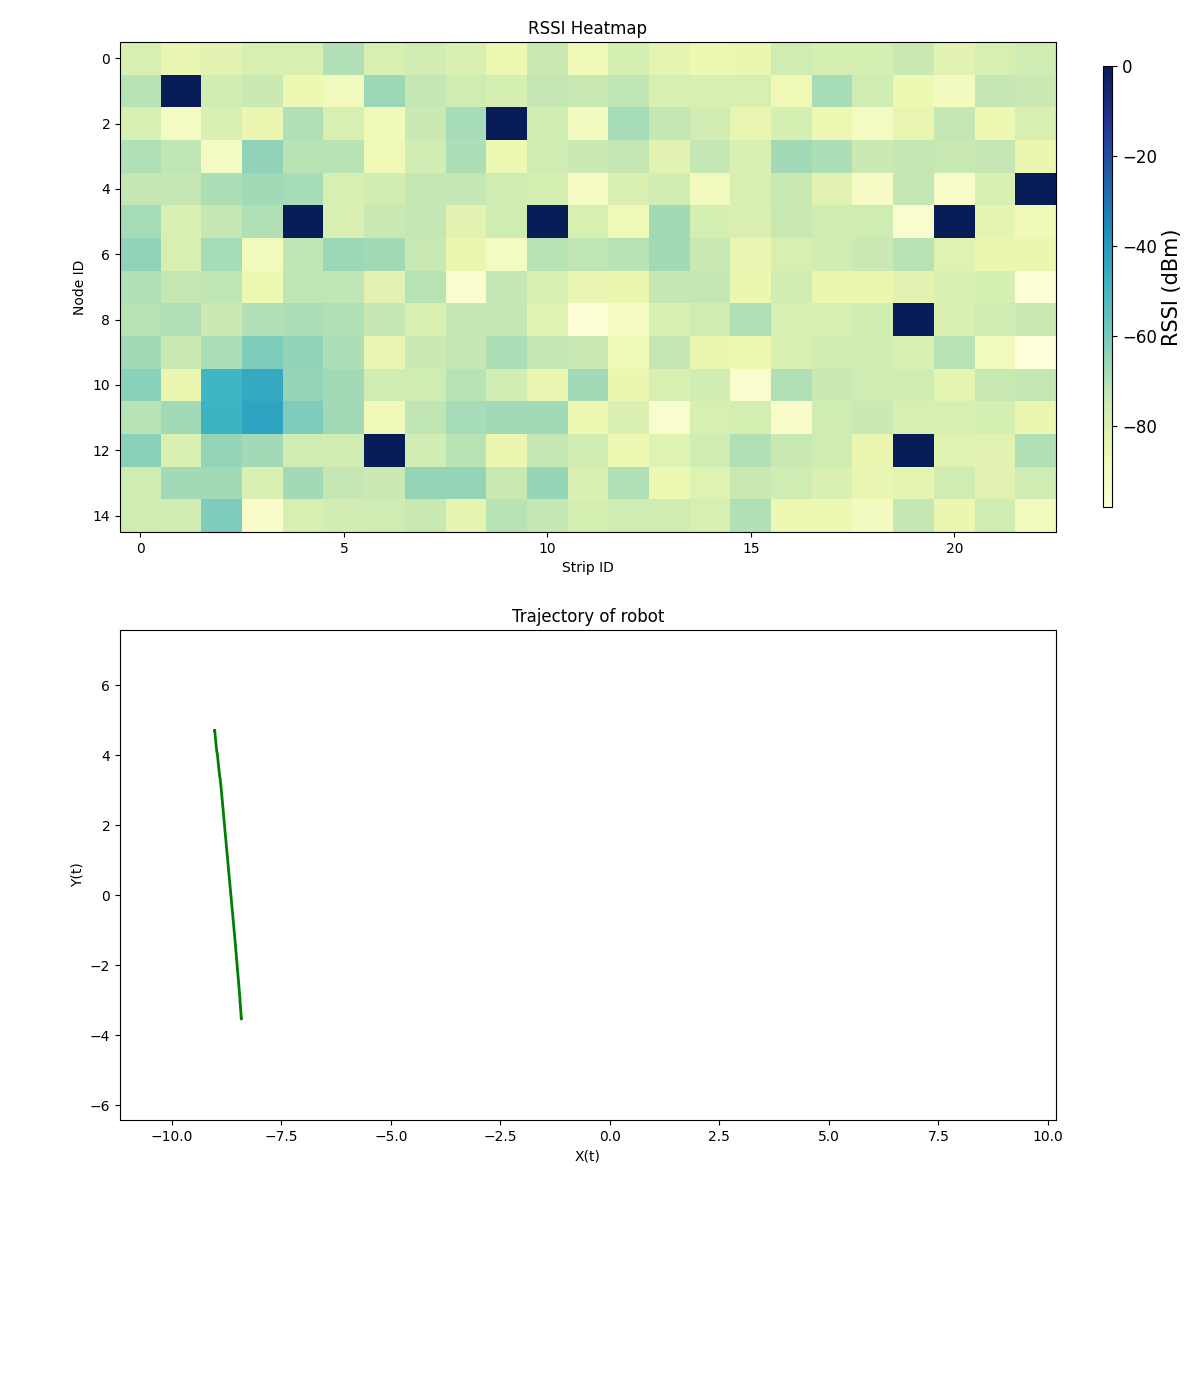

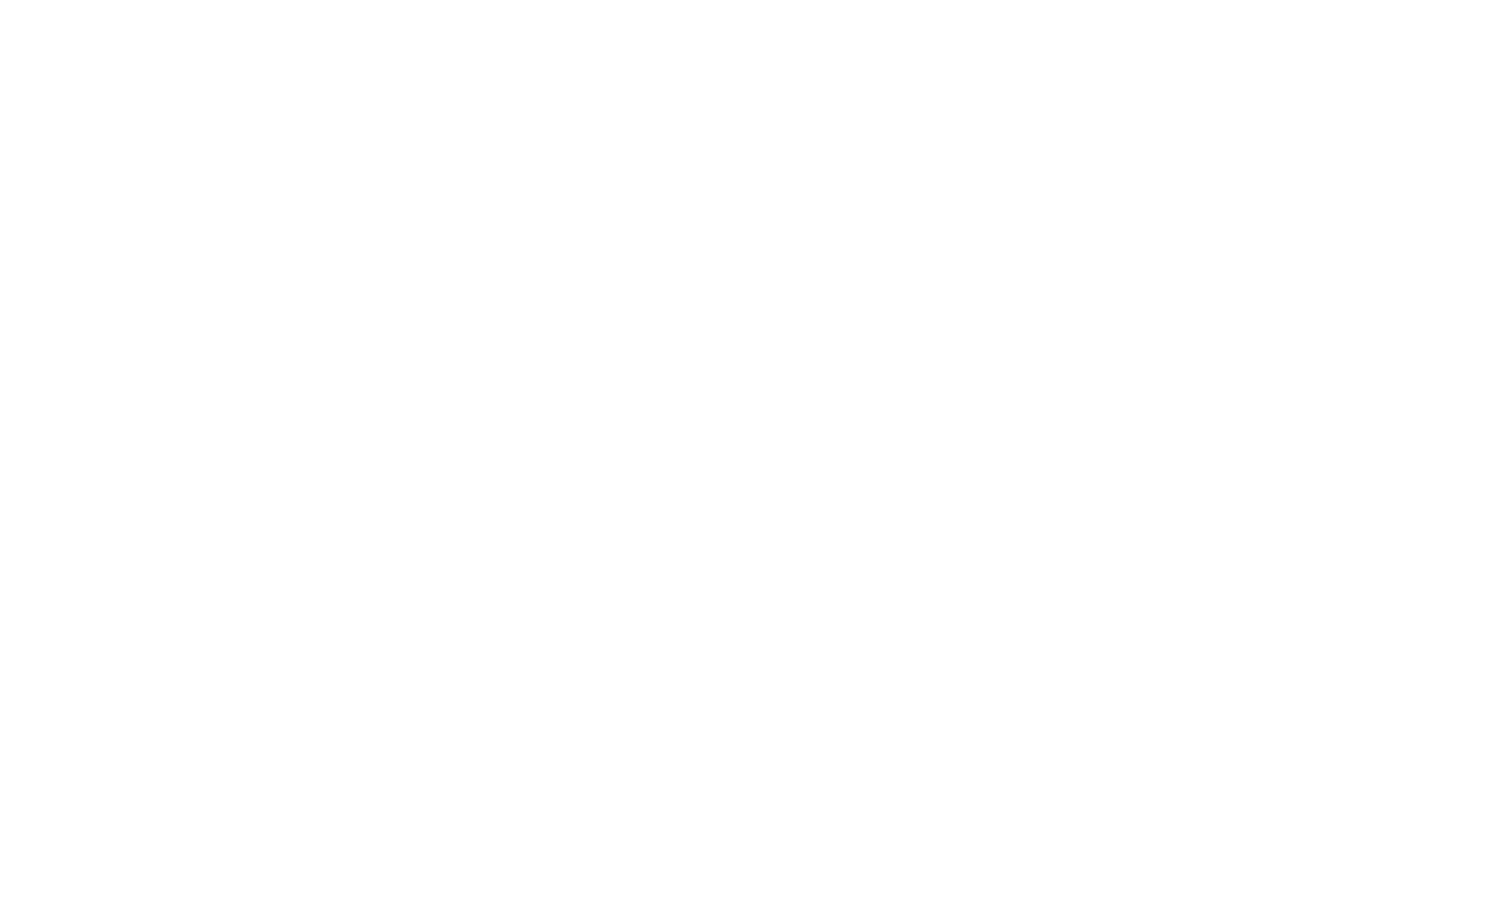

In [11]:
#MERGE RSSI HEATMAP & VICON COORDINATES WITH ANIMATION

#Heatmap animation over the time
from turtle import width
import matplotlib.animation as animation
%matplotlib ipympl
from matplotlib.widgets import Slider, Button, RadioButtons
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

#DEFINE DATASET ARRAY
x_sf = df_sf_filter['strip_id'].to_numpy()
y_sf = df_sf_filter['node_id'].to_numpy()
z_sf = df_sf_filter['rssi'].to_numpy()
t_sf = df_sf_filter['timestamp'].to_numpy()
dataSet_sf = np.array([x_sf, y_sf, z_sf, t_sf])
numDataPoints_sf = len(t_sf)
num_of_nodes = 15
num_of_strips = 23


#CREATE 3D ARRAY FOR HEATMAP
rssi_mat = np.empty((numDataPoints_sf,15,23))
timestamp_arr = np.empty((numDataPoints_sf,15,23))
fig = plt.figure(figsize=(15, 9))

for index in range(numDataPoints_sf):
    for node in range(num_of_nodes):
        for strip in range(num_of_strips):
            if node == int(dataSet_sf[1][index])-1 and strip == int(dataSet_sf[0][index])-1:
                rssi_mat[index][int(dataSet_sf[1][index])-1][int(dataSet_sf[0][index])-1] = (dataSet_sf[2][index])
                timestamp_arr[index][int(dataSet_sf[1][index])-1][int(dataSet_sf[0][index])-1] = (dataSet_sf[3][index])
            else:
                rssi_mat[index][node][strip] = rssi_mat[index-1][node][strip]
                timestamp_arr[index][node][strip] = timestamp_arr[index-1][node][strip]


numDataPoints_sf = dataSet_sf.shape[1]

delta_t_sf = round((t_sf.max()-t_sf.min())/numDataPoints_sf, 6)

#-------------------------------------------------------------------------------------------------------------------#

#CREATE DATASET FOR VICON COORDINATES
t_vc = df_vicon_filter['time'].to_numpy()
x_vc = df_vicon_filter['X'].to_numpy()
y_vc = df_vicon_filter['Y'].to_numpy()
dataSet_vc = np.array([x_vc, y_vc, t_vc])
numDataPoints_vc = len(t_vc)


numDataPoints_vc = dataSet_vc.shape[1]

delta_t_vc = round((t_vc.max()-t_vc.min())/numDataPoints_vc, 6)
#-------------------------------------------------------------------------------------------------------------------#

# GET SOME MATPLOTLIB OBJECTS
#fig, (ax1, ax2) = plt.subplots(figsize=(10,12), nrows=2)
fig = plt.figure(figsize=(12,14))
#plt.subplots_adjust(bottom=0.25)


# AXES PROPERTIES RSSI HEATMAP
ax1 = fig.add_subplot(211) #(row, column, pos)
#ax1.set_autoscale_on
ax1.set_xlabel('Strip ID')
ax1.set_ylabel('Node ID')
ax1.set_title('RSSI Heatmap')

# # AXES PROPERTIES VICON COORDINATES
ax2 = fig.add_subplot(212)
ax2.set_xlim(-11.185, 10.185)
ax2.set_ylim(-6.425, 7.575)
ax2.set_xlabel('X(t)')
ax2.set_ylabel('Y(t)')
ax2.set_title('Trajectory of robot')


#DISPLAY INITIAL IMAGE
im_h = ax1.imshow(rssi_mat[numDataPoints_sf-1], cmap="YlGnBu", aspect='auto')
axins = inset_axes(ax1,
                   width="1%",  # width = 5% of parent_bbox width
                   height="90%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 1.25, 1, 1),
                   bbox_transform=ax2.transAxes,
                   borderpad=0,
                   )
cbar = plt.colorbar(im_h, cax=axins, ax=ax1)
cbar.set_label(label='RSSI (dBm)', size=15)
cbar.ax.tick_params(labelsize=12)

line = ax2.plot(dataSet_vc[0], dataSet_vc[1], lw=2, c='g')[0] # For line plot


def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

def animate(num, rssi_mat, line, dataSet_sf, dataSet_vc):
    line.set_xdata(dataSet_vc[0, :num])
    line.set_ydata(dataSet_vc[1, :num])
    index_rssi = find_nearest(dataSet_sf[3], dataSet_vc[2,num])
    im_h.set_data(rssi_mat[index_rssi]) 
    return line

plt.subplots_adjust(left=0.1, bottom=0.2, right=0.88, top=0.97, hspace=0.2)
anim = animation.FuncAnimation(fig, animate, frames=numDataPoints_vc, fargs=(rssi_mat, line, dataSet_sf, dataSet_vc), interval=1, repeat=False, blit=False)
# anim.save(r'Animation_Move_Around4_17082022.mp4')

plt.show()

**MERGE RSSI HEATMAP & VICON COORDINATES WITH SLIDER**

In [12]:
# #MERGE RSSI HEATMAP & VICON COORDINATES WITH SLIDER

# #Heatmap animation over the time
# from turtle import width
# import matplotlib.animation as animation
# %matplotlib ipympl
# from matplotlib.widgets import Slider, Button, RadioButtons
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# #DEFINE DATASET ARRAY
# x_sf = df_sf_final['strip_id'].to_numpy()
# y_sf = df_sf_final['node_id'].to_numpy()
# z_sf = df_sf_final['rssi'].to_numpy()
# t_sf = df_sf_final['timestamp'].to_numpy()
# dataSet_sf = np.array([x_sf, y_sf, z_sf, t_sf])
# numDataPoints_sf = len(t_sf)
# num_of_nodes = 15
# num_of_strips = 23


# #CREATE 3D ARRAY FOR HEATMAP
# rssi_mat = np.empty((numDataPoints_sf,15,23))
# timestamp_arr = np.empty((numDataPoints_sf,15,23))
# fig = plt.figure(figsize=(15, 9))

# for index in range(numDataPoints_sf):
#     for node in range(num_of_nodes):
#         for strip in range(num_of_strips):
#             if node == int(dataSet_sf[1][index])-1 and strip == int(dataSet_sf[0][index])-1:
#                 rssi_mat[index][int(dataSet_sf[1][index])-1][int(dataSet_sf[0][index])-1] = (dataSet_sf[2][index])
#                 timestamp_arr[index][int(dataSet_sf[1][index])-1][int(dataSet_sf[0][index])-1] = (dataSet_sf[3][index])
#             else:
#                 rssi_mat[index][node][strip] = rssi_mat[index-1][node][strip]
#                 timestamp_arr[index][node][strip] = timestamp_arr[index-1][node][strip]

# #print("dataset sf old:", dataSet_sf.shape)
# #test = np.delete(dataSet_sf, 0, axis=1)
# num_del_index = 0
# num_del_last_index = 0

# #--------------------------------------uncomment to filter the timestamp---------------------------------------------#

# #DATA CLEANING/FILTERING THE DATA THAT BELOW CERTAIN TIMESTAMPS
# # for index in range(numDataPoints_sf-1):
# #     if dataSet_sf[3][index] < threshold_sf_down:
# #        num_del_index += 1
# #     elif dataSet_sf[3][index] > threshold_sf_up:
# #         num_del_last_index  += 1


# # #print("old t_sf:", t_sf, t_sf.shape, "rssi old: ", rssi_mat.shape)

# # dataSet_sf = np.delete(dataSet_sf, np.s_[0:num_del_index], axis=1)
# # rssi_mat = np.delete(rssi_mat, np.s_[0:num_del_index], axis=0)
# # timestamp_arr = np.delete(timestamp_arr, np.s_[0:num_del_index], axis=0)
# # x_sf = np.delete(x_sf, np.s_[0:num_del_index])
# # y_sf = np.delete(y_sf, np.s_[0:num_del_index])
# # z_sf = np.delete(z_sf, np.s_[0:num_del_index])
# # t_sf = np.delete(t_sf, np.s_[0:num_del_index])

# # dataSet_sf = np.delete(dataSet_sf, np.s_[-num_del_last_index:], axis=1)
# # rssi_mat = np.delete(rssi_mat, np.s_[-num_del_last_index:], axis=0)
# # timestamp_arr = np.delete(timestamp_arr, np.s_[-num_del_last_index:], axis=0)
# # x_sf = np.delete(x_sf, np.s_[-num_del_last_index:])
# # y_sf = np.delete(y_sf, np.s_[-num_del_last_index:])
# # z_sf = np.delete(z_sf, np.s_[-num_del_last_index:])
# # t_sf = np.delete(t_sf, np.s_[-num_del_last_index:])

# numDataPoints_sf = dataSet_sf.shape[1]
# # print("dataset sf:",dataSet_sf.shape, "rssi new: ", rssi_mat.shape)
# # print(dataSet_sf)

# delta_t_sf = round((t_sf.max()-t_sf.min())/numDataPoints_sf, 6)

# #print("new t_sf:", t_sf, t_sf.shape, "x_sf:", x_sf.shape, "y_sf:", y_sf.shape, "z_sf:", z_sf.shape)

# #-------------------------------------------------------------------------------------------------------------------#

# #CREATE DATASET FOR VICON COORDINATES
# t_vc = df_vicon_final['time'].to_numpy()
# x_vc = df_vicon_final['X'].to_numpy()
# y_vc = df_vicon_final['Y'].to_numpy()
# dataSet_vc = np.array([x_vc, y_vc, t_vc])
# numDataPoints_vc = len(t_vc)

# # print("dataset vc old:", dataSet_vc.shape)

# # #--------------------------------------uncomment to filter the timestamp---------------------------------------------#

# num_del_index = 0
# num_del_last_index = 0

# #DATA CLEANING/FILTERING THE DATA THAT BELOW CERTAIN TIMESTAMPS
# # for index in range(numDataPoints_vc-1):
# #     if dataSet_vc[2][index] < threshold_vc_down:
# #        num_del_index += 1
# #     elif dataSet_vc[2][index] > threshold_vc_up:
# #         num_del_last_index  += 1

# # #print("old t_vc:", t_vc, t_vc.shape)

# # dataSet_vc = np.delete(dataSet_vc, np.s_[0:num_del_index], axis=1)
# # x_vc = np.delete(x_vc, np.s_[0:num_del_index])
# # y_vc = np.delete(y_vc, np.s_[0:num_del_index])
# # t_vc = np.delete(t_vc, np.s_[0:num_del_index])

# # dataSet_vc = np.delete(dataSet_vc, np.s_[-num_del_last_index:], axis=1)
# # x_vc = np.delete(x_vc, np.s_[-num_del_last_index:])
# # y_vc = np.delete(y_vc, np.s_[-num_del_last_index:])
# # t_vc = np.delete(t_vc, np.s_[-num_del_last_index:])

# numDataPoints_vc = dataSet_vc.shape[1]
# # print("dataset vc:",dataSet_vc.shape)
# # print(dataSet_vc)

# delta_t_vc = round((t_vc.max()-t_vc.min())/numDataPoints_vc, 6)
# #-------------------------------------------------------------------------------------------------------------------#

# # GET SOME MATPLOTLIB OBJECTS
# #fig, (ax1, ax2) = plt.subplots(figsize=(10,12), nrows=2)
# fig = plt.figure(figsize=(12,14))
# plt.subplots_adjust(bottom=0.25)


# # AXES PROPERTIES RSSI HEATMAP
# ax1 = fig.add_subplot(211) #(row, column, pos)
# #ax1.set_autoscale_on
# ax1.set_xlabel('Strip ID')
# ax1.set_ylabel('Node ID')
# ax1.set_title('RSSI Heatmap')

# # # AXES PROPERTIES VICON COORDINATES
# ax2 = fig.add_subplot(212)
# ax2.set_xlim(-11.185, 10.185)
# ax2.set_ylim(-6.425, 7.575)
# ax2.set_xlabel('X(t)')
# ax2.set_ylabel('Y(t)')
# ax2.set_title('Trajectory of robot')


# # Defining the Slider button
# # xposition, yposition, width and height
# ax_slide_sf = plt.axes([0.155, 0.02, 0.65, 0.03])
# ax_slide_vc = plt.axes([0.155, 0.07, 0.65, 0.03])
# ax_slide_merge = plt.axes([0.155, 0.12, 0.65, 0.03])


# #DISPLAY INITIAL IMAGE
# im_h = ax1.imshow(rssi_mat[numDataPoints_sf-1], cmap="YlGnBu", aspect='auto')
# axins = inset_axes(ax1,
#                    width="1%",  # width = 5% of parent_bbox width
#                    height="90%",  # height : 50%
#                    loc='lower left',
#                    bbox_to_anchor=(1.05, 1.25, 1, 1),
#                    bbox_transform=ax2.transAxes,
#                    borderpad=0,
#                    )
# cbar = plt.colorbar(im_h, cax=axins, ax=ax1)
# cbar.set_label(label='RSSI (dBm)', size=15)
# cbar.ax.tick_params(labelsize=12)


# #cbar.ax.set_axes_locator
# # #cbar.set_ticks()

# line = ax2.plot(dataSet_vc[0], dataSet_vc[1], lw=2, c='g')[0] # For line plot


# # Properties of the slider
# #with filtered data
# # timestamp_rssi = Slider(ax_slide_sf, 'Timestamp SF(ms)',
# #                   dataSet_sf[3].min(), dataSet_sf[3].max(), valinit=dataSet_sf[3].min(), valstep=delta_t_sf)
# # timestamp_vc = Slider(ax_slide_vc, 'Timestamp VC(ms)',
# #                   dataSet_vc[2].min(), dataSet_vc[2].max(), valinit=dataSet_vc[2].min(), valstep=delta_t_vc)

# #normal data
# timestamp_rssi = Slider(ax_slide_sf, 'Timestamp SF(s)',
#                   t_sf.min(), t_sf.max(), valinit=t_sf.min(), valstep=delta_t_sf)
# timestamp_vc = Slider(ax_slide_vc, 'Timestamp VC(s)',
#                   t_vc.min(), t_vc.max(), valinit=t_vc.min(), valstep=delta_t_vc)
# timestamp_merge = Slider(ax_slide_merge, 'Timestamp (s)',
#                   t_vc.min(), t_vc.max(), valinit=t_vc.min(), valstep=delta_t_vc)

# def find_nearest(array, value):
#     array = np.asarray(array)
#     idx = (np.abs(array - value)).argmin()
#     return idx


# def update_heatmap(val):
#     pos = timestamp_rssi.val
#     index = find_nearest(dataSet_sf[3], pos)
#     im_h.set_data(rssi_mat[index])

# def update_coord(val):
#     pos = timestamp_vc.val
#     index = find_nearest(dataSet_vc[2], pos)
#     line.set_xdata(dataSet_vc[0, :index])
#     line.set_ydata(dataSet_vc[1, :index])

#     #redrawing the figure
#     fig.canvas.draw()    

# def update_all(val):
#     pos = timestamp_merge.val
#     index = find_nearest(dataSet_vc[2], pos)
#     line.set_xdata(dataSet_vc[0, :index])
#     line.set_ydata(dataSet_vc[1, :index])

#     index2 = find_nearest(dataSet_sf[3], pos)
#     im_h.set_data(rssi_mat[index2])

#     #redrawing the figure
#     fig.canvas.draw() 

# # Calling the function "update" when the value of the slider is changed
# timestamp_rssi.on_changed(update_heatmap)
# timestamp_vc.on_changed(update_coord)
# timestamp_merge.on_changed(update_all)

# #fig.tight_layout()
# plt.subplots_adjust(left=0.1, bottom=0.2, right=0.88, top=0.97, hspace=0.2)
# #plt.subplots_adjust(left=0.155, bottom=0.2, right=0.91, top=0.97, hspace=0.2)
# #plt.subplot_tool()
# plt.show()

In [13]:
# #MERGE RSSI HEATMAP & VICON COORDINATES WITH SLIDER
# #INCLUDING Magnetometer data

# #Heatmap animation over the time
# from turtle import width
# import matplotlib.animation as animation
# %matplotlib ipympl
# from matplotlib.widgets import Slider, Button, RadioButtons
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# #DEFINE DATASET ARRAY
# x_sf = df_sf_final['strip_id'].to_numpy()
# y_sf = df_sf_final['node_id'].to_numpy()
# z_sf = df_sf_final['rssi'].to_numpy()
# t_sf = df_sf_final['timestamp'].to_numpy()
# dataSet_sf = np.array([x_sf, y_sf, z_sf, t_sf])
# numDataPoints_sf = len(t_sf)
# num_of_nodes = 15
# num_of_strips = 23


# #CREATE 3D ARRAY FOR HEATMAP
# rssi_mat = np.empty((numDataPoints_sf,15,23))
# timestamp_arr = np.empty((numDataPoints_sf,15,23))
# fig = plt.figure(figsize=(15, 9))

# for index in range(numDataPoints_sf):
#     for node in range(num_of_nodes):
#         for strip in range(num_of_strips):
#             if node == int(dataSet_sf[1][index])-1 and strip == int(dataSet_sf[0][index])-1:
#                 rssi_mat[index][int(dataSet_sf[1][index])-1][int(dataSet_sf[0][index])-1] = (dataSet_sf[2][index])
#                 timestamp_arr[index][int(dataSet_sf[1][index])-1][int(dataSet_sf[0][index])-1] = (dataSet_sf[3][index])
#             else:
#                 rssi_mat[index][node][strip] = rssi_mat[index-1][node][strip]
#                 timestamp_arr[index][node][strip] = timestamp_arr[index-1][node][strip]

# #print("dataset sf old:", dataSet_sf.shape)
# #test = np.delete(dataSet_sf, 0, axis=1)
# num_del_index = 0
# num_del_last_index = 0

# #--------------------------------------uncomment to filter the timestamp---------------------------------------------#

# #DATA CLEANING/FILTERING THE DATA THAT BELOW CERTAIN TIMESTAMPS
# # for index in range(numDataPoints_sf-1):
# #     if dataSet_sf[3][index] < threshold_sf_down:
# #        num_del_index += 1
# #     elif dataSet_sf[3][index] > threshold_sf_up:
# #         num_del_last_index  += 1


# # #print("old t_sf:", t_sf, t_sf.shape, "rssi old: ", rssi_mat.shape)

# # dataSet_sf = np.delete(dataSet_sf, np.s_[0:num_del_index], axis=1)
# # rssi_mat = np.delete(rssi_mat, np.s_[0:num_del_index], axis=0)
# # timestamp_arr = np.delete(timestamp_arr, np.s_[0:num_del_index], axis=0)
# # x_sf = np.delete(x_sf, np.s_[0:num_del_index])
# # y_sf = np.delete(y_sf, np.s_[0:num_del_index])
# # z_sf = np.delete(z_sf, np.s_[0:num_del_index])
# # t_sf = np.delete(t_sf, np.s_[0:num_del_index])

# # dataSet_sf = np.delete(dataSet_sf, np.s_[-num_del_last_index:], axis=1)
# # rssi_mat = np.delete(rssi_mat, np.s_[-num_del_last_index:], axis=0)
# # timestamp_arr = np.delete(timestamp_arr, np.s_[-num_del_last_index:], axis=0)
# # x_sf = np.delete(x_sf, np.s_[-num_del_last_index:])
# # y_sf = np.delete(y_sf, np.s_[-num_del_last_index:])
# # z_sf = np.delete(z_sf, np.s_[-num_del_last_index:])
# # t_sf = np.delete(t_sf, np.s_[-num_del_last_index:])

# numDataPoints_sf = dataSet_sf.shape[1]
# # print("dataset sf:",dataSet_sf.shape, "rssi new: ", rssi_mat.shape)
# # print(dataSet_sf)

# delta_t_sf = round((t_sf.max()-t_sf.min())/numDataPoints_sf, 6)

# #print("new t_sf:", t_sf, t_sf.shape, "x_sf:", x_sf.shape, "y_sf:", y_sf.shape, "z_sf:", z_sf.shape)

# #-------------------------------------------------------------------------------------------------------------------#

# #CREATE DATASET FOR VICON COORDINATES
# t_vc = df_vicon_final['time'].to_numpy()
# x_vc = df_vicon_final['X'].to_numpy()
# y_vc = df_vicon_final['Y'].to_numpy()
# dataSet_vc = np.array([x_vc, y_vc, t_vc])
# numDataPoints_vc = len(t_vc)

# # print("dataset vc old:", dataSet_vc.shape)

# # #--------------------------------------uncomment to filter the timestamp---------------------------------------------#

# num_del_index = 0
# num_del_last_index = 0

# #DATA CLEANING/FILTERING THE DATA THAT BELOW CERTAIN TIMESTAMPS
# # for index in range(numDataPoints_vc-1):
# #     if dataSet_vc[2][index] < threshold_vc_down:
# #        num_del_index += 1
# #     elif dataSet_vc[2][index] > threshold_vc_up:
# #         num_del_last_index  += 1

# # #print("old t_vc:", t_vc, t_vc.shape)

# # dataSet_vc = np.delete(dataSet_vc, np.s_[0:num_del_index], axis=1)
# # x_vc = np.delete(x_vc, np.s_[0:num_del_index])
# # y_vc = np.delete(y_vc, np.s_[0:num_del_index])
# # t_vc = np.delete(t_vc, np.s_[0:num_del_index])

# # dataSet_vc = np.delete(dataSet_vc, np.s_[-num_del_last_index:], axis=1)
# # x_vc = np.delete(x_vc, np.s_[-num_del_last_index:])
# # y_vc = np.delete(y_vc, np.s_[-num_del_last_index:])
# # t_vc = np.delete(t_vc, np.s_[-num_del_last_index:])

# numDataPoints_vc = dataSet_vc.shape[1]
# # print("dataset vc:",dataSet_vc.shape)
# # print(dataSet_vc)

# delta_t_vc = round((t_vc.max()-t_vc.min())/numDataPoints_vc, 6)
# #-------------------------------------------------------------------------------------------------------------------#

# # GET SOME MATPLOTLIB OBJECTS
# #fig, (ax1, ax2) = plt.subplots(figsize=(10,12), nrows=2)
# fig = plt.figure(figsize=(12,14))
# plt.subplots_adjust(bottom=0.25)


# # AXES PROPERTIES RSSI HEATMAP
# ax1 = fig.add_subplot(211) #(row, column, pos)
# #ax1.set_autoscale_on
# ax1.set_xlabel('Strip ID')
# ax1.set_ylabel('Node ID')
# ax1.set_title('RSSI Heatmap')

# # # AXES PROPERTIES VICON COORDINATES
# ax2 = fig.add_subplot(212)
# ax2.set_xlim(-11.185, 10.185)
# ax2.set_ylim(-6.425, 7.575)
# ax2.set_xlabel('X(t)')
# ax2.set_ylabel('Y(t)')
# ax2.set_title('Trajectory of robot')


# # Defining the Slider button
# # xposition, yposition, width and height
# ax_slide_sf = plt.axes([0.155, 0.02, 0.65, 0.03])
# ax_slide_vc = plt.axes([0.155, 0.07, 0.65, 0.03])
# ax_slide_merge = plt.axes([0.155, 0.12, 0.65, 0.03])


# #DISPLAY INITIAL IMAGE
# im_h = ax1.imshow(rssi_mat[numDataPoints_sf-1], cmap="YlGnBu", aspect='auto')
# axins = inset_axes(ax1,
#                    width="1%",  # width = 5% of parent_bbox width
#                    height="90%",  # height : 50%
#                    loc='lower left',
#                    bbox_to_anchor=(1.05, 1.25, 1, 1),
#                    bbox_transform=ax2.transAxes,
#                    borderpad=0,
#                    )
# cbar = plt.colorbar(im_h, cax=axins, ax=ax1)
# cbar.set_label(label='RSSI (dBm)', size=15)
# cbar.ax.tick_params(labelsize=12)


# #cbar.ax.set_axes_locator
# # #cbar.set_ticks()

# line = ax2.plot(dataSet_vc[0], dataSet_vc[1], lw=2, c='g')[0] # For line plot


# # Properties of the slider
# #with filtered data
# # timestamp_rssi = Slider(ax_slide_sf, 'Timestamp SF(ms)',
# #                   dataSet_sf[3].min(), dataSet_sf[3].max(), valinit=dataSet_sf[3].min(), valstep=delta_t_sf)
# # timestamp_vc = Slider(ax_slide_vc, 'Timestamp VC(ms)',
# #                   dataSet_vc[2].min(), dataSet_vc[2].max(), valinit=dataSet_vc[2].min(), valstep=delta_t_vc)

# #normal data
# timestamp_rssi = Slider(ax_slide_sf, 'Timestamp SF(s)',
#                   t_sf.min(), t_sf.max(), valinit=t_sf.min(), valstep=delta_t_sf)
# timestamp_vc = Slider(ax_slide_vc, 'Timestamp VC(s)',
#                   t_vc.min(), t_vc.max(), valinit=t_vc.min(), valstep=delta_t_vc)
# timestamp_merge = Slider(ax_slide_merge, 'Timestamp (s)',
#                   t_vc.min(), t_vc.max(), valinit=t_vc.min(), valstep=delta_t_vc)

# def find_nearest(array, value):
#     array = np.asarray(array)
#     idx = (np.abs(array - value)).argmin()
#     return idx


# def update_heatmap(val):
#     pos = timestamp_rssi.val
#     index = find_nearest(dataSet_sf[3], pos)
#     im_h.set_data(rssi_mat[index])

# def update_coord(val):
#     pos = timestamp_vc.val
#     index = find_nearest(dataSet_vc[2], pos)
#     line.set_xdata(dataSet_vc[0, :index])
#     line.set_ydata(dataSet_vc[1, :index])

#     #redrawing the figure
#     fig.canvas.draw()    

# def update_all(val):
#     pos = timestamp_merge.val
#     index = find_nearest(dataSet_vc[2], pos)
#     line.set_xdata(dataSet_vc[0, :index])
#     line.set_ydata(dataSet_vc[1, :index])

#     index2 = find_nearest(dataSet_sf[3], pos)
#     im_h.set_data(rssi_mat[index2])

#     #redrawing the figure
#     fig.canvas.draw() 

# # Calling the function "update" when the value of the slider is changed
# timestamp_rssi.on_changed(update_heatmap)
# timestamp_vc.on_changed(update_coord)
# timestamp_merge.on_changed(update_all)

# #fig.tight_layout()
# plt.subplots_adjust(left=0.1, bottom=0.2, right=0.88, top=0.97, hspace=0.2)
# #plt.subplots_adjust(left=0.155, bottom=0.2, right=0.91, top=0.97, hspace=0.2)
# #plt.subplot_tool()
# plt.show()

In [14]:
# print(dataSet_sf.shape)
# data_trans = np.transpose(dataSet_sf)
# test_sf = pd.DataFrame(data_trans, columns=['strip_id','node_id','rssi','timestamp'])
# test_sf

# print(dataSet_sf.shape)
# print(dataSet_sf[3][0])
# # print(rssi_mat.shape[0], dataSet_vc.shape)

**CREATE FRAME FOR MERGED DATASET**

In [15]:
#CREATE FRAME FOR MERGED DATASET

#INITIALIZE THE VARIABLES
strip_id = ''
node_id = ''
rssi_val = ''
timestamp = ''
count = 0
frame = ""

#TRANSPOSE the dataset of VICON
dataSet_vc_trans = np.transpose(dataSet_vc)
array_frame_vc = dataSet_vc_trans.astype(object)

#DEFINE STRING ARRAY FOR SF FRAME
array_frame_sf = np.empty(rssi_mat.shape[0], dtype=object)

#DEFINE STRING ARRAY FOR VICON FRAME
dataSet_vc_trans = np.transpose(dataSet_vc)
array_frame_vc = dataSet_vc_trans.astype(object)

for index in range(rssi_mat.shape[0]):
    for col in range(rssi_mat[index].shape[1]):
        for row in range(rssi_mat[index].shape[0]):
            if count == 0:
                strip_id += '{"strip_id":' + '{"' + str(count) + '":' + str(col+1) + ','
                node_id += ',"node_id":' + '{"' + str(count) + '":' + str(row+1) + ','
                rssi_val += ',"r":' + '{"' + str(count) + '":' + str(rssi_mat[index][row][col]) + ','
                timestamp += ',"timestamp":' + '{"' + str(count) + '":' + str(timestamp_arr[index][row][col]) + ','
                count += 1
            elif count == 344:
                strip_id += '"' + str(count) + '":' + str(col+1) + '}'
                node_id += '"' + str(count) + '":' + str(row+1) + '}'
                #rssi_val += '"' + str(count) + '":' + str(rssi_mat[345][row][col]) + '}' + '}'
                rssi_val += '"' + str(count) + '":' + str(rssi_mat[index][row][col]) + '}'
                timestamp += '"' + str(count) + '":' + str(timestamp_arr[index][row][col]) + '}' + '}'
                count = 0
            else:

                strip_id += '"' + str(count) + '":' + str(col+1) + ','
                node_id += '"' + str(count) + '":' + str(row+1) + ','
                rssi_val += '"' + str(count) + '":' + str(rssi_mat[index][row][col]) + ','
                timestamp += '"' + str(count) + '":' + str(timestamp_arr[index][row][col]) + ','
                count += 1
            

    frame = strip_id + node_id + rssi_val + timestamp
    #print(frame)
    array_frame_sf[index] = frame
    frame = ""
    strip_id = ""
    node_id = ""
    rssi_val = ""
    timestamp = ""

    
print(array_frame_sf)

def closest_timestamp(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

# frame_sf = pd.DataFrame(array_frame, columns=['data'])
# frame_sf

#MERGE DATASET
frame_number = np.empty(array_frame_vc.shape[0], dtype=object)
frame_data = np.empty(array_frame_vc.shape[0], dtype=object)
frame_count = 0
for row in range(array_frame_vc.shape[0]):
    time_vc = dataSet_vc[2][row]
    #index_vc = closest_timestamp(dataSet_vc[2], time_vc)
    index_sf = closest_timestamp(dataSet_sf[3], time_vc)

    frame_number[row] = str(frame_count)
    frame_data[row] = array_frame_sf[index_sf]
    frame_count += 1

#print(frame_number)
#print(frame_data)


['{"strip_id":{"0":1,"1":1,"2":1,"3":1,"4":1,"5":1,"6":1,"7":1,"8":1,"9":1,"10":1,"11":1,"12":1,"13":1,"14":1,"15":2,"16":2,"17":2,"18":2,"19":2,"20":2,"21":2,"22":2,"23":2,"24":2,"25":2,"26":2,"27":2,"28":2,"29":2,"30":3,"31":3,"32":3,"33":3,"34":3,"35":3,"36":3,"37":3,"38":3,"39":3,"40":3,"41":3,"42":3,"43":3,"44":3,"45":4,"46":4,"47":4,"48":4,"49":4,"50":4,"51":4,"52":4,"53":4,"54":4,"55":4,"56":4,"57":4,"58":4,"59":4,"60":5,"61":5,"62":5,"63":5,"64":5,"65":5,"66":5,"67":5,"68":5,"69":5,"70":5,"71":5,"72":5,"73":5,"74":5,"75":6,"76":6,"77":6,"78":6,"79":6,"80":6,"81":6,"82":6,"83":6,"84":6,"85":6,"86":6,"87":6,"88":6,"89":6,"90":7,"91":7,"92":7,"93":7,"94":7,"95":7,"96":7,"97":7,"98":7,"99":7,"100":7,"101":7,"102":7,"103":7,"104":7,"105":8,"106":8,"107":8,"108":8,"109":8,"110":8,"111":8,"112":8,"113":8,"114":8,"115":8,"116":8,"117":8,"118":8,"119":8,"120":9,"121":9,"122":9,"123":9,"124":9,"125":9,"126":9,"127":9,"128":9,"129":9,"130":9,"131":9,"132":9,"133":9,"134":9,"135":10,"136":

**GENERATES THE DATASET AS .CSV FILE**

In [16]:
dataSet_final = np.array([frame_number, array_frame_vc[:,0], array_frame_vc[:,1], frame_data])
dataSet_final = np.transpose(dataSet_final)
#dataSet_final.shape
frame_sf = pd.DataFrame(dataSet_final, columns=['frame','vicon_X','vicon_Y','data'])
data_dir = '../Dataset_sensor_floor/Dataset_Final/02092022/'
csv_name = data_dir + 'dataset_0209022_' + dataset_name + '.csv'
frame_sf.to_csv(csv_name, index=False)
dataSet_final

array([['0', -9.022744090082867, 4.701307499492385,
        '{"strip_id":{"0":1,"1":1,"2":1,"3":1,"4":1,"5":1,"6":1,"7":1,"8":1,"9":1,"10":1,"11":1,"12":1,"13":1,"14":1,"15":2,"16":2,"17":2,"18":2,"19":2,"20":2,"21":2,"22":2,"23":2,"24":2,"25":2,"26":2,"27":2,"28":2,"29":2,"30":3,"31":3,"32":3,"33":3,"34":3,"35":3,"36":3,"37":3,"38":3,"39":3,"40":3,"41":3,"42":3,"43":3,"44":3,"45":4,"46":4,"47":4,"48":4,"49":4,"50":4,"51":4,"52":4,"53":4,"54":4,"55":4,"56":4,"57":4,"58":4,"59":4,"60":5,"61":5,"62":5,"63":5,"64":5,"65":5,"66":5,"67":5,"68":5,"69":5,"70":5,"71":5,"72":5,"73":5,"74":5,"75":6,"76":6,"77":6,"78":6,"79":6,"80":6,"81":6,"82":6,"83":6,"84":6,"85":6,"86":6,"87":6,"88":6,"89":6,"90":7,"91":7,"92":7,"93":7,"94":7,"95":7,"96":7,"97":7,"98":7,"99":7,"100":7,"101":7,"102":7,"103":7,"104":7,"105":8,"106":8,"107":8,"108":8,"109":8,"110":8,"111":8,"112":8,"113":8,"114":8,"115":8,"116":8,"117":8,"118":8,"119":8,"120":9,"121":9,"122":9,"123":9,"124":9,"125":9,"126":9,"127":9,"128":9,"129

In [17]:
# frame_sf